In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import yfinance as yf
import scipy.stats as stats
from datetime import datetime
from datetime import timedelta
import random

pd.set_option('display.max_columns', None)
# pd.options.display.float_format = '{:.6f}'.format

path = 'data/'

In [2]:
# ticker = '^GSPC'
# t = yf.Ticker(ticker)
# df = t.history(period='max')
# df.shape

In [3]:
# rnd_nro = str(random.randint(100,999))
# time_code = datetime.today().strftime('%Y%m%d_%H%M')
# file_name = time_code + '_' + ticker + '_' + rnd_nro + '.pkl'
# df.to_pickle(path + file_name)
# file_name

In [4]:
file_name = '20230610_1844_^GSPC_608.pkl'

In [5]:
df = pd.read_pickle(path + file_name)
df.shape

(18479, 7)

In [6]:
df.sample(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1955-10-03,42.490002,42.490002,42.490002,42.490002,2720000,0,0
1976-06-30,0.000000,105.070000,103.519997,104.279999,23830000,0,0
1951-06-20,21.910000,21.910000,21.910000,21.910000,1120000,0,0
1977-09-08,0.000000,98.430000,97.010002,97.279999,18290000,0,0
1951-05-08,22.610001,22.610001,22.610001,22.610001,1600000,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18479 entries, 1950-01-03 to 2023-06-09
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          18479 non-null  float64
 1   High          18479 non-null  float64
 2   Low           18479 non-null  float64
 3   Close         18479 non-null  float64
 4   Volume        18479 non-null  int64  
 5   Dividends     18479 non-null  int64  
 6   Stock Splits  18479 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.1 MB


In [8]:
df.resample('M').first()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-31,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-02-28,17.049999,17.049999,17.049999,17.049999,1810000,0,0
1950-03-31,17.240000,17.240000,17.240000,17.240000,1410000,0,0
1950-04-30,17.530001,17.530001,17.530001,17.530001,1570000,0,0
1950-05-31,18.219999,18.219999,18.219999,18.219999,2390000,0,0
...,...,...,...,...,...,...,...
2023-02-28,4070.070068,4148.950195,4037.199951,4119.209961,4856930000,0,0
2023-03-31,3963.340088,3971.729980,3939.050049,3951.389893,4249480000,0,0
2023-04-30,4102.200195,4127.660156,4098.790039,4124.509766,4234700000,0,0


In [9]:
df = df.resample('M').first().copy()
df.shape

(882, 7)

In [10]:
df.index = df.index.to_period('M')
df.index = df.index.to_timestamp()

In [11]:
df['Dividends'].sum(), df['Stock Splits'].sum()

(0, 0)

In [12]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [13]:
my_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

In [14]:
df = df[my_cols].copy()
df.shape

(882, 5)

In [15]:
df.index

DatetimeIndex(['1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01',
               ...
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01'],
              dtype='datetime64[ns]', name='Date', length=882, freq='MS')

In [16]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1950-01-01,16.660000,16.660000,16.660000,16.660000,1260000
1950-02-01,17.049999,17.049999,17.049999,17.049999,1810000
1950-03-01,17.240000,17.240000,17.240000,17.240000,1410000
1950-04-01,17.530001,17.530001,17.530001,17.530001,1570000
1950-05-01,18.219999,18.219999,18.219999,18.219999,2390000


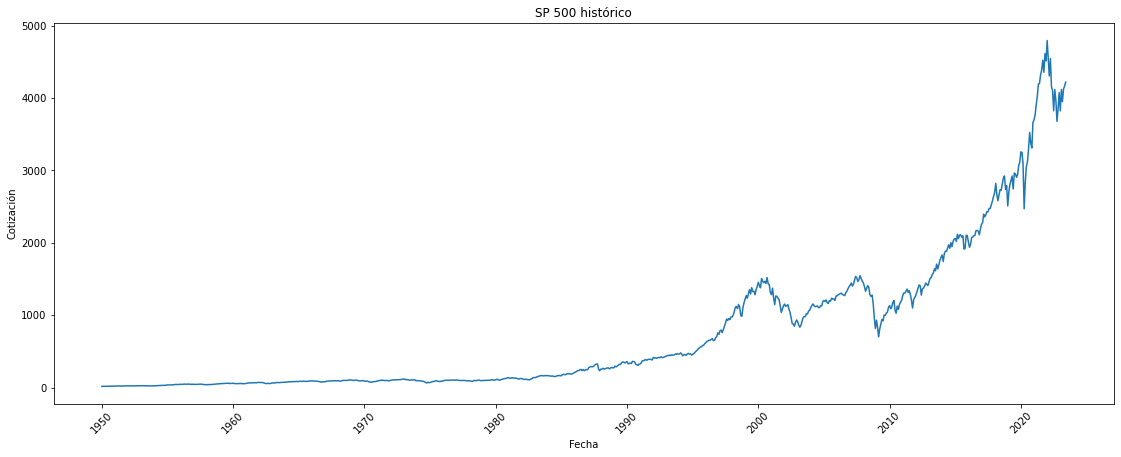

In [17]:
df_plot = df.copy()
# df_plot['Date'] = df_plot.index.to_timestamp()

plt.figure(figsize=(19,7))
sns.lineplot(data=df_plot, x='Date', y='Close')
plt.ylabel('Cotización')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.title('SP 500 histórico')
plt.show();

## Rentabilidad

In [18]:
# df.drop('Dividends', axis=1, inplace=True)
# df.drop('Stock Splits', axis=1, inplace=True)
df['rendimiento_simple_mensual'] = df['Close'] / df['Close'].shift(1) - 1
df['rendimiento_log_mensual'] = np.log(df['Close'] / df['Close'].shift(1))
df.shape

(882, 7)

In [19]:
df.head()

,Open,High,Low,Close,Volume,rendimiento_simple_mensual,rendimiento_log_mensual
Date,,,,,,,
1950-01-01,16.660000,16.660000,16.660000,16.660000,1260000,NaN,NaN
1950-02-01,17.049999,17.049999,17.049999,17.049999,1810000,0.023409,0.023140
1950-03-01,17.240000,17.240000,17.240000,17.240000,1410000,0.011144,0.011082
1950-04-01,17.530001,17.530001,17.530001,17.530001,1570000,0.016821,0.016681
1950-05-01,18.219999,18.219999,18.219999,18.219999,2390000,0.039361,0.038606


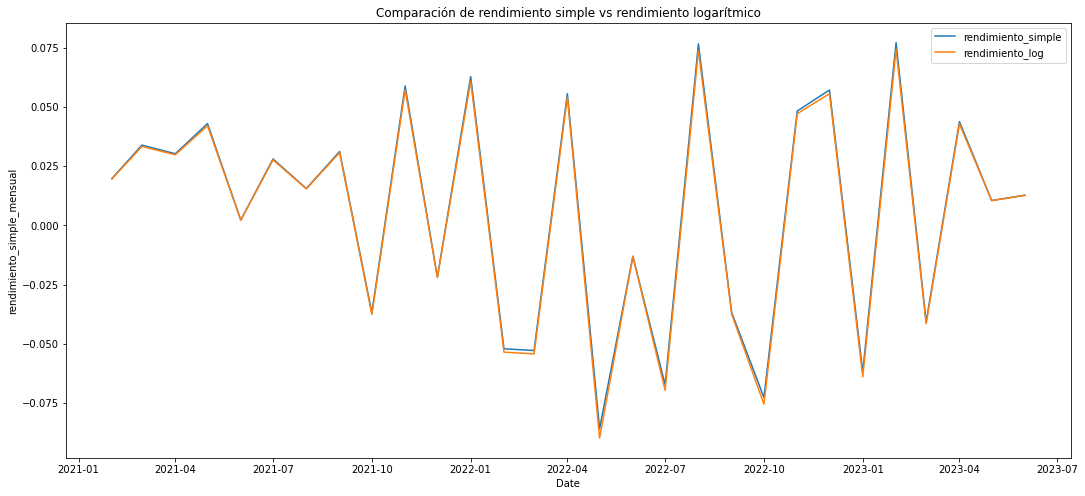

In [20]:
df_plot = df[df.index>'2021'].copy()
# df_plot['Date'] = df_plot.index.to_timestamp()
plt.figure(figsize=(18,8))
sns.lineplot(data=df_plot, x='Date', y='rendimiento_simple_mensual', label='rendimiento_simple')
sns.lineplot(data=df_plot, x='Date', y='rendimiento_log_mensual', label='rendimiento_log')
plt.title('Comparación de rendimiento simple vs rendimiento logarítmico')
plt.legend()
plt.show();

In [21]:
df.iloc[-5:][['Close', 'rendimiento_simple_mensual']]

,Close,rendimiento_simple_mensual
Date,,
2023-02-01,4119.209961,0.077160
2023-03-01,3951.389893,-0.040741
2023-04-01,4124.509766,0.043812
2023-05-01,4167.870117,0.010513
2023-06-01,4221.020020,0.012752


In [22]:
media_retorno_aritmetico = df['rendimiento_simple_mensual'].mean()
print('Promedio de retorno mensual:', media_retorno_aritmetico)

Promedio de retorno mensual: 0.007221148578145905


In [23]:
df.iloc[0]['Close']

16.65999984741211

In [24]:
df.iloc[-1]['Close']

4221.02001953125

In [25]:
df.shape[0]

882

In [26]:
media_retorno_geometrico = (df.iloc[-1]['Close'] / df.iloc[0]['Close'])**(1/df.shape[0]) - 1
print('Retorno mensual geométrico:', media_retorno_geometrico)

Retorno mensual geométrico: 0.006295038773904915


In [27]:
print('Calcular retornos con el promedio de retorno aritmético, sobre estima:')
print('Aritmético', round(media_retorno_aritmetico*100, 2), '%')
print('Geométrico', round(media_retorno_geometrico*100, 2), '%')

Calcular retornos con el promedio de retorno aritmético, sobre estima:
Aritmético 0.72 %
Geométrico 0.63 %


In [28]:
print('Cotización final con promedio aritmético:', df.iloc[0]['Close'] * (1 + media_retorno_aritmetico)**df.shape[0])
print('Cotización final con promedio geométrico:', df.iloc[0]['Close'] * (1 + media_retorno_geometrico)**df.shape[0])
print('Cotización real:', df.iloc[-1]['Close'])

Cotización final con promedio aritmético: 9501.242352078973
Cotización final con promedio geométrico: 4221.020019531098
Cotización real: 4221.02001953125


In [29]:
valor_inicial = df.iloc[0]['Close']
valor_final = df.iloc[-1]['Close']
tasa_real_de_retorno = valor_final / valor_inicial
print('La tasa de retorno en', round((df.index[-1] - df.index[0]).days / 365, 2), 'años es de', round(tasa_real_de_retorno*100, 2), '%')

La tasa de retorno en 73.46 años es de 25336.25 %


In [30]:
total_meses = df.shape[0]
meses = 12

tasa_anualizada_retorno = (tasa_real_de_retorno)**(meses/total_meses) - 1
print('La tasa de retorno anualizada es de', round(tasa_anualizada_retorno*100, 2), '%')

La tasa de retorno anualizada es de 7.82 %


In [31]:
desv_std = df['rendimiento_simple_mensual'].std()
print('Desvío estándar del porcentaje de retorno mensual:', round(desv_std*100, 3), '%')

Desvío estándar del porcentaje de retorno mensual: 4.265 %


In [32]:
meses = 12
desv_std_anualizado = df['rendimiento_simple_mensual'].std() * (meses**0.5)
print('Desvío estándar del porcentaje de retorno mensual anualizado es de', round(desv_std_anualizado*100, 3), '%')

Desvío estándar del porcentaje de retorno mensual anualizado es de 14.775 %


## Ratio de Sharpe

In [33]:
tasa_anualizada_retorno, desv_std_anualizado

(0.07821154684197107, 0.14775379535989072)

In [34]:
tasa_libre_riesgo = 0.02
ratio_sharpe = (tasa_anualizada_retorno - tasa_libre_riesgo) / desv_std_anualizado
print('El rato de Sharpe es:', round(ratio_sharpe * 100, 2))

El rato de Sharpe es: 39.4


## Intervalo de confianza y Valor Riesgo (VaR)

In [35]:
media_retorno_aritmetico, media_retorno_geometrico, desv_std, desv_std_anualizado

(0.007221148578145905,
 0.006295038773904915,
 0.04265284676241089,
 0.14775379535989072)

In [36]:
dsv_std_2_neg = media_retorno_geometrico - (df['rendimiento_simple_mensual'].std() * 2)
dsv_std_2_pos = media_retorno_geometrico + (df['rendimiento_simple_mensual'].std() * 2)

print('El 95% de los meses, el retorno de S&P500 estará entre', round(dsv_std_2_neg*100, 2), '% y', round(dsv_std_2_pos*100, 2), '%')

El 95% de los meses, el retorno de S&P500 estará entre -7.9 % y 9.16 %


In [37]:
dsv_std_2_neg = media_retorno_geometrico - (desv_std * 2)
dsv_std_2_pos = media_retorno_geometrico + (desv_std * 2)

print('El 95% de los meses, el retorno de S&P500 estará entre', round(dsv_std_2_neg*100, 2), '% y', round(dsv_std_2_pos*100, 2), '%')

El 95% de los meses, el retorno de S&P500 estará entre -7.9 % y 9.16 %


---

In [38]:
gold_file = '20230611_0158_GC=F_544.pkl'
silver_file = '20230611_0158_SI=F_550.pkl'

In [39]:
gold = pd.read_pickle(path + gold_file)
gold.shape

(5716, 7)

In [40]:
gold

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,0,0,0
2000-08-31,274.799988,278.299988,274.799988,278.299988,0,0,0
2000-09-01,277.000000,277.000000,277.000000,277.000000,0,0,0
2000-09-05,275.799988,275.799988,275.799988,275.799988,2,0,0
2000-09-06,274.200012,274.200012,274.200012,274.200012,0,0,0
...,...,...,...,...,...,...,...
2023-06-05,1947.500000,1961.900024,1937.800049,1958.000000,713,0,0
2023-06-06,1960.800049,1965.500000,1958.800049,1965.500000,164,0,0
2023-06-07,1959.000000,1968.400024,1940.699951,1942.699951,139,0,0


In [41]:
gold = gold.resample('M').first()
gold.index = gold.index.to_period('M')
gold.shape

(275, 7)

In [42]:
gold

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-08,273.899994,273.899994,273.899994,273.899994,0,0,0
2000-09,277.000000,277.000000,277.000000,277.000000,0,0,0
2000-10,272.799988,273.500000,272.500000,273.100006,161,0,0
2000-11,263.899994,263.899994,263.899994,263.899994,0,0,0
2000-12,269.700012,272.000000,268.500000,268.700012,332,0,0
...,...,...,...,...,...,...,...
2023-02,1927.199951,1955.000000,1922.000000,1927.800049,2290,0,0
2023-03,1827.099976,1841.699951,1827.099976,1837.699951,211,0,0
2023-04,1968.099976,1991.699951,1950.000000,1983.900024,737,0,0


In [43]:
silver = pd.read_pickle(path + silver_file)
silver.shape

(5716, 7)

In [44]:
silver

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-08-30,4.950000,4.950000,4.895000,4.930000,2319,0,0
2000-08-31,4.920000,5.045000,4.920000,5.003000,1612,0,0
2000-09-01,5.035000,5.035000,4.985000,5.004000,1375,0,0
2000-09-05,4.990000,5.005000,4.975000,4.998000,856,0,0
2000-09-06,5.000000,5.000000,4.980000,4.983000,232,0,0
...,...,...,...,...,...,...,...
2023-06-05,23.534000,23.534000,23.534000,23.534000,0,0,0
2023-06-06,23.573999,23.573999,23.573999,23.573999,62,0,0
2023-06-07,23.438999,23.438999,23.438999,23.438999,0,0,0


In [45]:
silver = silver.resample('M').first()
silver.index = silver.index.to_period('M')
silver.shape

(275, 7)

In [46]:
silver

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-08,4.950000,4.950000,4.895000,4.930000,2319,0,0
2000-09,5.035000,5.035000,4.985000,5.004000,1375,0,0
2000-10,4.906000,4.906000,4.906000,4.906000,0,0,0
2000-11,4.774000,4.774000,4.774000,4.774000,0,0,0
2000-12,4.675000,4.685000,4.640000,4.640000,208,0,0
...,...,...,...,...,...,...,...
2023-02,23.520000,23.834999,23.510000,23.521000,12,0,0
2023-03,20.879999,21.150000,20.879999,20.959000,577,0,0
2023-04,23.725000,24.070000,23.695000,23.941000,26,0,0


In [47]:
(gold.index != silver.index).sum()

0

In [48]:
gold['Dividends'].unique(), gold['Stock Splits'].unique(), silver['Dividends'].unique(), silver['Stock Splits'].unique()

(array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64))

In [49]:
gold.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [50]:
my_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

In [51]:
data = pd.concat([gold[my_cols].add_prefix('gold_'), silver[my_cols].add_prefix('silver_')], axis=1)

In [52]:
data

,gold_Open,gold_High,gold_Low,gold_Close,gold_Volume,silver_Open,silver_High,silver_Low,silver_Close,silver_Volume
Date,,,,,,,,,,
2000-08,273.899994,273.899994,273.899994,273.899994,0,4.950000,4.950000,4.895000,4.930000,2319
2000-09,277.000000,277.000000,277.000000,277.000000,0,5.035000,5.035000,4.985000,5.004000,1375
2000-10,272.799988,273.500000,272.500000,273.100006,161,4.906000,4.906000,4.906000,4.906000,0
2000-11,263.899994,263.899994,263.899994,263.899994,0,4.774000,4.774000,4.774000,4.774000,0
2000-12,269.700012,272.000000,268.500000,268.700012,332,4.675000,4.685000,4.640000,4.640000,208
...,...,...,...,...,...,...,...,...,...,...
2023-02,1927.199951,1955.000000,1922.000000,1927.800049,2290,23.520000,23.834999,23.510000,23.521000,12
2023-03,1827.099976,1841.699951,1827.099976,1837.699951,211,20.879999,21.150000,20.879999,20.959000,577
2023-04,1968.099976,1991.699951,1950.000000,1983.900024,737,23.725000,24.070000,23.695000,23.941000,26


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 275 entries, 2000-08 to 2023-06
Freq: M
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gold_Open      275 non-null    float64
 1   gold_High      275 non-null    float64
 2   gold_Low       275 non-null    float64
 3   gold_Close     275 non-null    float64
 4   gold_Volume    275 non-null    int64  
 5   silver_Open    275 non-null    float64
 6   silver_High    275 non-null    float64
 7   silver_Low     275 non-null    float64
 8   silver_Close   275 non-null    float64
 9   silver_Volume  275 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 23.6 KB


In [54]:
data.index.dtype

period[M]

In [55]:
close_cols = ['gold_Close', 'silver_Close']

In [56]:
data[close_cols]

,gold_Close,silver_Close
Date,,
2000-08,273.899994,4.930000
2000-09,277.000000,5.004000
2000-10,273.100006,4.906000
2000-11,263.899994,4.774000
2000-12,268.700012,4.640000
...,...,...
2023-02,1927.800049,23.521000
2023-03,1837.699951,20.959000
2023-04,1983.900024,23.941000


In [57]:
data[close_cols].info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 275 entries, 2000-08 to 2023-06
Freq: M
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gold_Close    275 non-null    float64
 1   silver_Close  275 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


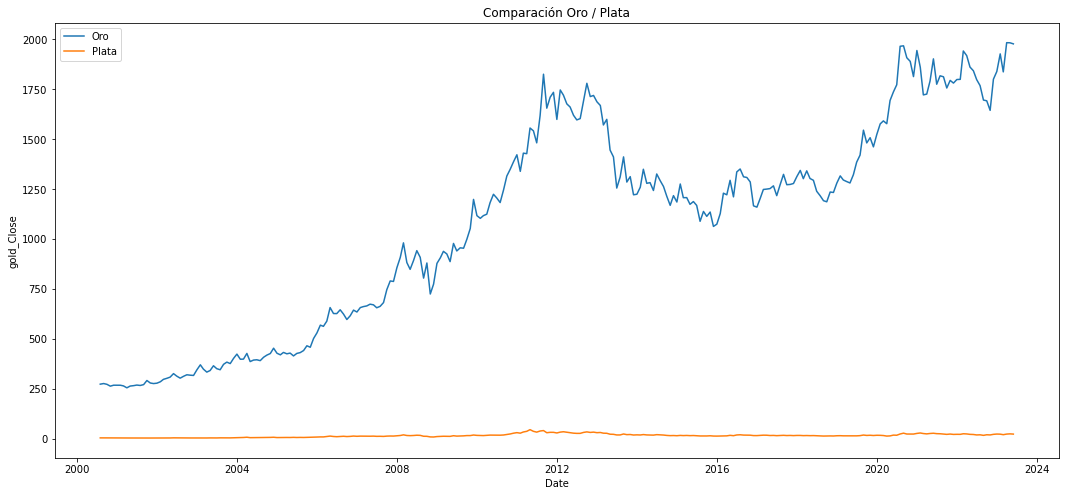

In [58]:
df_plot = data[close_cols].copy()
df_plot['Date'] = df_plot.index.to_timestamp()
plt.figure(figsize=(18,8))
sns.lineplot(data=df_plot, x='Date', y='gold_Close', label='Oro')
sns.lineplot(data=df_plot, x='Date', y='silver_Close', label='Plata')
plt.title('Comparación Oro / Plata')
plt.legend()
plt.show();

In [59]:
data = data[close_cols].copy()
data

,gold_Close,silver_Close
Date,,
2000-08,273.899994,4.930000
2000-09,277.000000,5.004000
2000-10,273.100006,4.906000
2000-11,263.899994,4.774000
2000-12,268.700012,4.640000
...,...,...
2023-02,1927.800049,23.521000
2023-03,1837.699951,20.959000
2023-04,1983.900024,23.941000


In [60]:
data['log_n_G/X'] = np.log(data['gold_Close'] / data['silver_Close'])
data.head()

,gold_Close,silver_Close,log_n_G/X
Date,,,
2000-08,273.899994,4.930,4.017424
2000-09,277.000000,5.004,4.013780
2000-10,273.100006,4.906,4.019379
2000-11,263.899994,4.774,4.012386
2000-12,268.700012,4.640,4.058881


In [61]:
media_relacion = data['log_n_G/X'].mean()
desvio_relacion = data['log_n_G/X'].std()
print('Media del logaritmo natural de Gold/Silver:', round(media_relacion, 3))
print('Desvío estándar del logaritmo natural de Gold/Silver:', round(desvio_relacion, 3))

Media del logaritmo natural de Gold/Silver: 4.19
Desvío estándar del logaritmo natural de Gold/Silver: 0.192


In [62]:
min_intervalo = media_relacion - desvio_relacion * 2
max_intervalo = media_relacion + desvio_relacion * 2
print('Intervalo de confianza:')
print('Un movimiento extraordinario se da cuando supera entre', round(min_intervalo,3), 'para abajo o', round(max_intervalo,3), 'para arriba')

Intervalo de confianza:
Un movimiento extraordinario se da cuando supera entre 3.807 para abajo o 4.574 para arriba


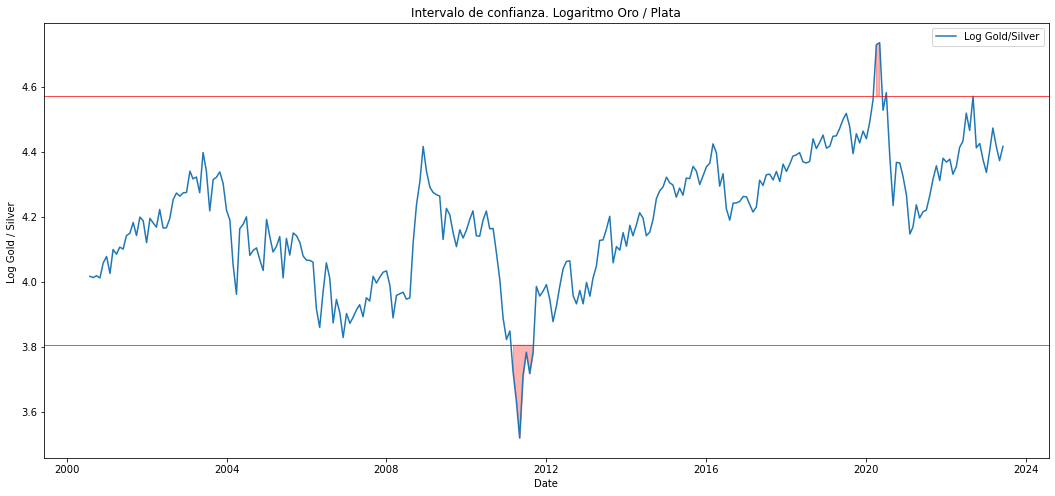

In [63]:
df_plot = data.copy()
df_plot['Date'] = df_plot.index.to_timestamp()
plt.figure(figsize=(18,8))
sns.lineplot(data=df_plot, x='Date', y='log_n_G/X', label='Log Gold/Silver')
plt.axhline(y=min_intervalo, color='red', linestyle='-', linewidth=0.7)
plt.axhline(y=max_intervalo, color='red', linestyle='-', linewidth=0.7)
plt.fill_between(df_plot['Date'], df_plot['log_n_G/X'], min_intervalo, where=(df_plot['log_n_G/X'] <= min_intervalo), alpha=0.3, color='red')
plt.fill_between(df_plot['Date'], df_plot['log_n_G/X'], max_intervalo, where=(df_plot['log_n_G/X'] >= max_intervalo), alpha=0.3, color='red')
plt.title('Intervalo de confianza. Logaritmo Oro / Plata')
plt.ylabel('Log Gold / Silver ')
plt.legend()
plt.show();